In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math

columns = ["ID Number", "Diagnosis", "Mean Radius", "Mean texture", "Mean perimeter", "Mean area", "Mean smoothness (local variation in radius lengths)", "Mean compactness (perimeter^2 / area - 1.0)", "Mean concavity (severity of concave portions of the contour)", "Mean concave points (number of concave portions of the contour)", "Mean symmetry", "Mean fractal dimension ('coastline approximation' - 1)", "SE radius", "SE texture", "SE perimeter", "SE area", "SE smoothness (local variation in radius lengths)", "SE compactness (perimeter^2 / area - 1.0)", "SE concavity (severity of concave portions of the contour)", "SE concave points (number of concave portions of the contour)", "SE symmetry", "SE fractal dimension ('coastline approximation' - 1)", "Worse radius", "Worse texture", "Worse perimeter", "Worse area", "Worse smoothness (local variation in radius lengths)", "Worse compactness (perimeter^2 / area - 1.0)", "Worse concavity (severity of concave portions of the contour)", "Worse concave points (number of concave portions of the contour)", "Worse symmetry", "Worse fractal dimension ('coastline approximation' - 1)"]
columns2 = ["Mean Radius", "Mean texture", "Mean perimeter", "Mean area", "Mean smoothness (local variation in radius lengths)", "Mean compactness (perimeter^2 / area - 1.0)", "Mean concavity (severity of concave portions of the contour)", "Mean concave points (number of concave portions of the contour)", "Mean symmetry", "Mean fractal dimension ('coastline approximation' - 1)", "SE radius", "SE texture", "SE perimeter", "SE area", "SE smoothness (local variation in radius lengths)", "SE compactness (perimeter^2 / area - 1.0)", "SE concavity (severity of concave portions of the contour)", "SE concave points (number of concave portions of the contour)", "SE symmetry", "SE fractal dimension ('coastline approximation' - 1)", "Worse radius", "Worse texture", "Worse perimeter", "Worse area", "Worse smoothness (local variation in radius lengths)", "Worse compactness (perimeter^2 / area - 1.0)", "Worse concavity (severity of concave portions of the contour)", "Worse concave points (number of concave portions of the contour)", "Worse symmetry", "Worse fractal dimension ('coastline approximation' - 1)"]
df = pd.read_csv(r"data - Copy.csv", index_col = False, names = columns,header = None)

Diag = df["Diagnosis"]
df2 = df.copy()
del df2['ID Number']
del df2['Diagnosis']
centralized_df2 = (df2-df2.mean())
standardized_df2=(df2-df2.mean())/(df2.std())
x = standardized_df2.to_numpy()

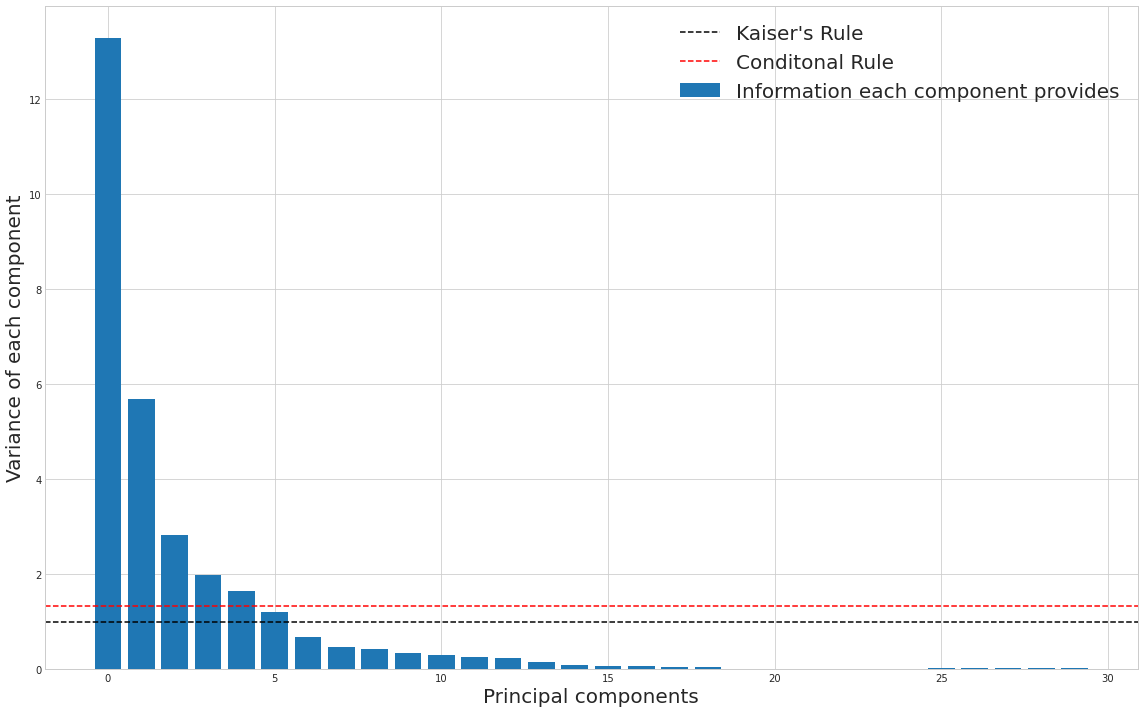

In [2]:
cov = np.cov(x.T)
eig_vals, eig_vecs = np.linalg.eig(cov)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
threshold = 1
threshold2 = max(eig_vals)/10

kaiser_rule = []
conditional_rule = []
for i in range(len(eig_vals)):
    if (eig_vals[i] > 1):
        kaiser_rule.append(eig_vals[i])
    if (max(eig_vals)/eig_vals[i] < 10):
        conditional_rule.append(eig_vals[i])

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 10))
    plt.bar(range(30), eig_vals, alpha=1, label='Information each component provides')
    plt.ylabel('Variance of each component',fontsize = 20)
    plt.xlabel('Principal components',fontsize = 20)
    plt.axhline(y=threshold,color='black',linestyle = '--',label="Kaiser's Rule")
    plt.axhline(y=threshold2,color = 'red',linestyle = '--',label = "Conditonal Rule")
    plt.legend(loc='best',fontsize = 20)
    plt.tight_layout()
plt.show()

In [3]:
feature_vector = []
for i in range (6):
    feature_vector.append(eig_pairs[i][1])
feature_vector = np.array(feature_vector)
#after pca
print(feature_vector.shape)
#before pca
print(x.shape)
new_data = x.dot(feature_vector.T)

(6, 30)
(569, 30)


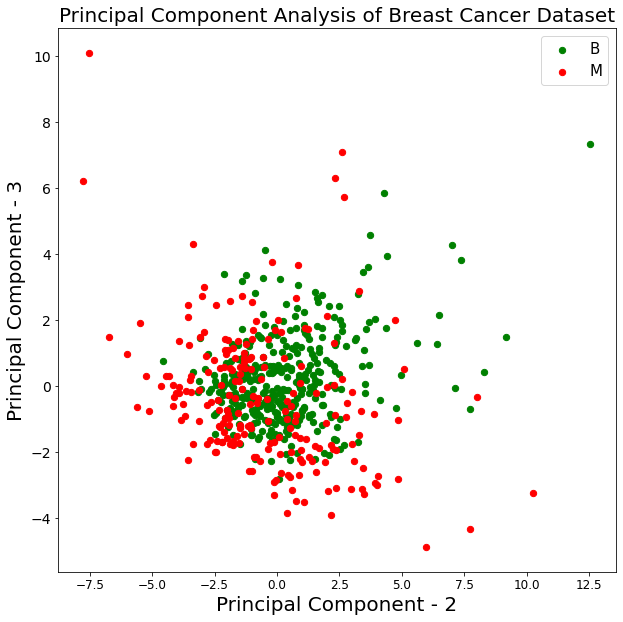

In [4]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 2',fontsize=20)
plt.ylabel('Principal Component - 3',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['B', 'M']
colors = ['g', 'r']
new_data = pd.DataFrame(new_data, columns = ['Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4','Principal Component 5','Principal Component 6'])
new_data["Diagnosis"] = Diag
#new_data.to_csv("transformed_data.csv")
for target, color in zip(targets,colors):
    indicesToKeep = df['Diagnosis'] == target
    plt.scatter(new_data.loc[indicesToKeep, 'Principal Component 2'], new_data.loc[indicesToKeep, 'Principal Component 3'], c = color, s = 40)
plt.legend(targets,prop={'size': 15})

92.09138840070298 and 6.41
7.908611599297018


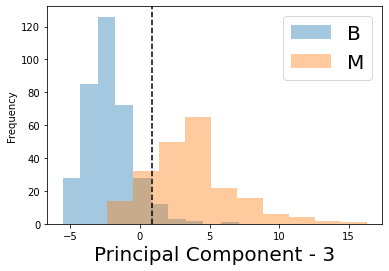

In [5]:
new_data = pd.DataFrame(new_data)
new_data['Diagnosis'] = Diag
grouped = new_data.groupby(new_data["Diagnosis"])
Malignant = grouped.get_group("M")
del Malignant["Diagnosis"]
Benign = grouped.get_group("B")
del Benign["Diagnosis"]
list1 = list(new_data.columns)
t = []
error = []
accuracy = []
num = 0
#Plotting a histogram
new_data.groupby("Diagnosis")[list1[num]].plot(kind="hist",alpha=0.4)
count = 0
err = 0
benign_data = list(Benign[list1[num]])
malignant_data = list(Malignant[list1[num]])
er = []
a = []
e = []
co = []
mini = math.floor(new_data[list1[num]].min())
maxi = new_data[list1[num]].max()+1
inter = 0.01
for threshold in np.arange (mini,maxi,inter):
    err = 0
    count = 0
    for i in range (0,len(benign_data)):
        if i < len(malignant_data):
            if malignant_data[i] > threshold:
                count = count + 1
            else:
                err = err + 1
        if benign_data[i] < threshold:
            count = count + 1
        else:
            err = err+1
    a.append(count*100/(err+count)) #accuracy of each threshold
    e.append(err*100/(err+count)) #error rate of each threshold
    er.append(err) #no of errors
    co.append(count) #no of correct predictions
for i in range(0,len(a)):
    if a[i] == max(a):
        j = i
        thr = inter*i
        print(str(a[i])+" and "+str(thr)) #highest accuracy
        print(100-a[i]) #error rate
        break
threshold = new_data[list1[num]].min() + thr #threshold for highest accuracy
t.append(threshold) #appends threshold of each principal component
error.append(100-a[i]) #error of each principal component
accuracy.append(a[i]) #accuracy of each principal component
plt.xlabel('Principal Component - 3', fontsize=20)
plt.legend(fontsize = 20)
plt.axvline(x=threshold,color='black',linestyle = '--')
plt.show()